# Click Through Rate Prediction

## Introduction
With the advent of digital age, companies are paying top dollars in web advertising to promote their businesses and convert potential customers to sales. In 2018, around 108 billion was spent in digital marketing in U.S which is more than 50% increase since 2015 and it is projected to grow approximately 85% till 2023. One of the important aspects of digital marketing is predicting potential customers and targeting them efficiently where browsing history and navigation plays an important role to predict which ads are suitable to the user and post them accordingly.

Data source: https://www.kaggle.com/c/avazu-ctr-prediction/data

## Data Exploration

We will be calculating Click Through Rate (CTR) values to decide which unique member of the column has the highest influence. CTR is a method used to find out how frequently people clicked on the ad. 
<br>
**CTR (Click Through Rate) = (Total Measured Clicks / Total Ad Impressions)*100**
<br>
Similarly,
<br>
**CTR value = (Total Measured Clicks / Total Ad Impressions)**
<br>
The Questions we will be answering:
<br>
- Which banner positions is better and has the highest CTR.
- Which unique values of all the features mentioned below was went unnoticed.
- Which unique values from all the fields have highest CRT.
- Which hidden trends and patterns from the anonymous field can be considered.

#### Packages:
- numpy – allows efficient numerical computations.
<br>
- pandas – provides data structures for data analysis.
<br>
- scikit-learn – for machine learning algorithms.
<br>
- matplotlib – for plotting data.
<br>
- seaborn – for extra plot types and for more elegant and readable plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Dataset
Our dataset comprises of the following features:

- id: ad identifier
- click: 0 for non-click, 1 for click
- hour: in the format of YYMMDDHH so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1: anonymized categorical variable
- banner_pos: where a banner is placed, 1 and 0
- site_id: site identifier
- site_domain: site domain
- site_category: site category
- app_id: mobile app 
- app_domain : app domain 
- app_category : app category
- device_id: mobile device unique id
- device_ip: IP address
- device_model : mobile model type
- device_type: device type
- device_conn_type: type of connection e.g mobile network, Wifi
- C14 - C21 : Anonymous variables

In [2]:
pwd

'/Users/ankurghogale/Data Analytics Programming (Lab)/Untitled Folder/X19193866-DMML-Final Submission'

In [3]:
df_train = pd.read_csv('/Users/ankurghogale/Data Analytics Programming (Lab)/Untitled Folder/CTR/train-2.csv', nrows=1000000)

In [4]:
df_train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
df_train.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

Let's take a look at the first few rows of our dataset and try to understand it.

In [6]:
df_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [7]:
df_train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.376314e+18,0.160219,1.410210e+07,1005.088166,0.229922,1.025540,0.223363,18262.203151,318.965808,56.495546,2041.031112,1.452262,190.779388,45505.857239,69.936118
std,5.236908e+18,0.366809,1.493256e+00,1.156928,0.464627,0.453899,0.667164,3510.366302,19.452897,36.546944,441.200965,1.362637,273.439286,49843.810147,38.513846
min,9.984920e+12,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.846660e+18,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,15707.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,43.000000
50%,9.834387e+18,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,19251.000000,320.000000,50.000000,2161.000000,1.000000,39.000000,-1.000000,61.000000
75%,1.373053e+19,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,21153.000000,320.000000,50.000000,2420.000000,3.000000,297.000000,100084.000000,79.000000
max,1.844670e+19,1.000000,1.410210e+07,1012.000000,7.000000,5.000000,5.000000,21705.000000,1024.000000,1024.000000,2497.000000,3.000000,1835.000000,100248.000000,195.000000


In [8]:
df_train.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [9]:
df_train.corr()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,1.000000,-0.001356,0.047629,-0.000223,0.000234,-0.000245,0.002894,0.005968,0.001067,-0.000072,0.006148,0.010091,-0.000970,-0.001191,-0.008093
click,-0.001356,1.000000,-0.020853,-0.059860,0.036385,-0.041731,-0.045750,-0.115704,-0.035653,0.125290,-0.112090,-0.050099,0.026632,-0.025932,-0.072312
hour,0.047629,-0.020853,1.000000,0.038353,0.028166,-0.030154,0.019416,0.066437,0.001054,-0.005193,0.069866,0.280987,0.017529,0.058601,-0.170369
C1,-0.000223,-0.059860,0.038353,1.000000,0.186650,0.714494,0.161111,0.152519,0.034433,-0.002861,0.159908,0.085196,0.022748,0.037990,0.045869
banner_pos,0.000234,0.036385,0.028166,0.186650,1.000000,0.254132,-0.079831,0.000637,-0.044179,-0.065587,-0.020340,0.050703,0.224848,0.051611,-0.067083
device_type,-0.000245,-0.041731,-0.030154,0.714494,0.254132,1.000000,0.078003,0.114061,0.046331,0.004891,0.120308,0.028419,-0.018553,-0.057960,0.094635
device_conn_type,0.002894,-0.045750,0.019416,0.161111,-0.079831,0.078003,1.000000,0.069238,0.097845,-0.015622,0.077470,0.058461,0.023576,-0.005385,0.028706
C14,0.005968,-0.115704,0.066437,0.152519,0.000637,0.114061,0.069238,1.000000,-0.006040,0.023303,0.977047,0.214389,0.192309,0.037679,0.197414
C15,0.001067,-0.035653,0.001054,0.034433,-0.044179,0.046331,0.097845,-0.006040,1.000000,-0.102451,-0.009916,-0.014094,0.070679,0.026235,0.041650
C16,-0.000072,0.125290,-0.005193,-0.002861,-0.065587,0.004891,-0.015622,0.023303,-0.102451,1.000000,0.034452,0.076230,-0.077316,-0.015524,-0.158999


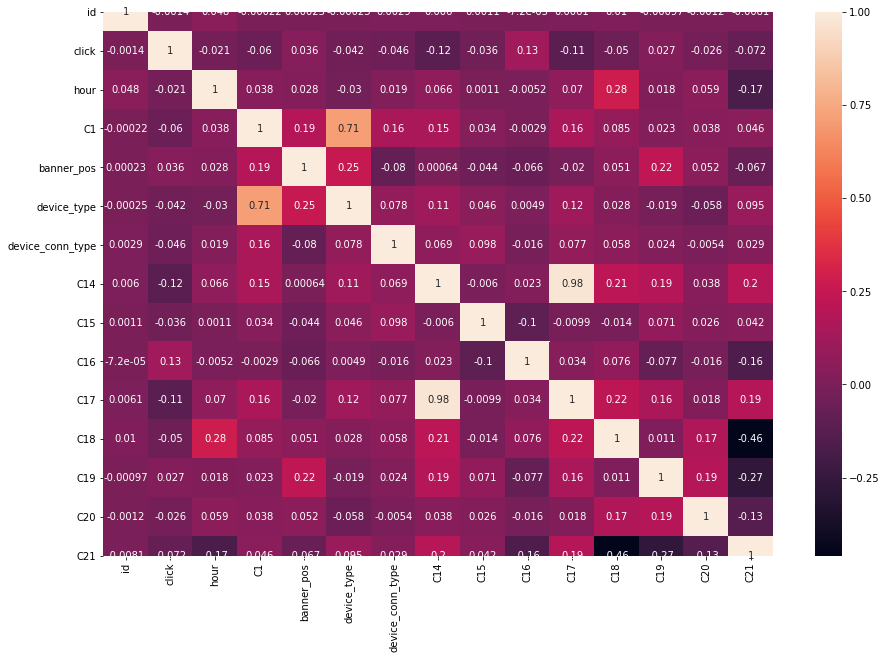

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(), annot=True)

## Feature Engineering
The dataset can be divided into features to perform further analysis depending upon the fields. These features can be used to perform feature engineering.
<br>
- **Target Feature** : 'click'
- **Site Feature** : 'site_id', 'site_domain', 'site_category'
- **App Feature** : 'app_id', 'app_domain', 'app_category'
- **Device Feature** : 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type'
- **Anonymous Field Feature** : 'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21' 


### Target Features

In [11]:
df_train['click'].describe()

count    1000000.000000
mean           0.160219
std            0.366809
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click, dtype: float64

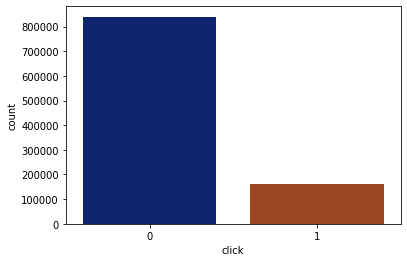

In [12]:
sns.countplot(x='click',data=df_train, palette='dark')
plt.show();

We can notice that out of 300k ids around **250k** ids did **not click** and a very small amount clicked. It can be made more clear by converting it into percentage.

In [13]:
df_train['click'].value_counts()/len(df_train)

0    0.839781
1    0.160219
Name: click, dtype: float64

We can see that around **83%** is *unclicked* and ony **17%** is *clicked*. Very small amount of population clicked the advertisement and others ignored it.

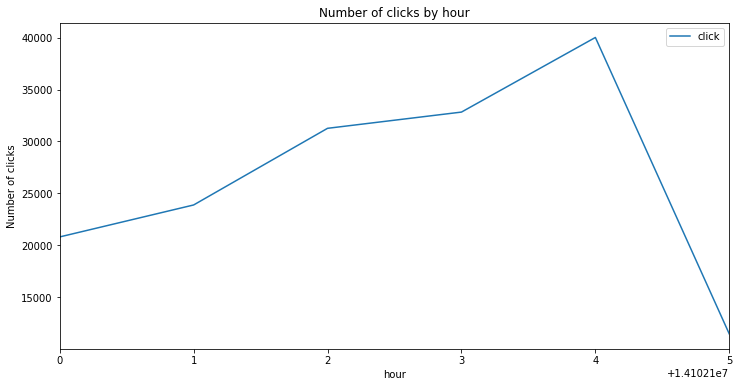

In [14]:
df_train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

As we have data for only five hours, we can not get any correct overview or draw any conclusion from the hour column. We can remove this column as the information feeded is partial.

In [15]:
# Label Encoding
import sklearn.model_selection
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['device_id'] = label_encoder.fit_transform(df_train['device_id'])
df_train['site_id'] = label_encoder.fit_transform(df_train['site_id'])
df_train['site_domain'] = label_encoder.fit_transform(df_train['site_domain'])
df_train['site_category'] = label_encoder.fit_transform(df_train['site_category'])
df_train['app_id'] = label_encoder.fit_transform(df_train['app_id'])
df_train['app_domain'] = label_encoder.fit_transform(df_train['app_domain'])
df_train['app_category'] = label_encoder.fit_transform(df_train['app_category'])
df_train['device_ip'] = label_encoder.fit_transform(df_train['device_ip'])
df_train['device_model'] = label_encoder.fit_transform(df_train['device_model'])

### C1 Features

In [16]:
df_train.C1.unique()

array([1005, 1002, 1010, 1001, 1007, 1008, 1012])

There are 7 unique values in C1. Now let's try to find the doinance of each value in the field.

In [17]:
(df_train['C1'].value_counts()/len(df_train))*100

1005    93.5852
1002     3.1219
1010     1.8488
1012     1.1916
1008     0.1563
1007     0.0855
1001     0.0107
Name: C1, dtype: float64

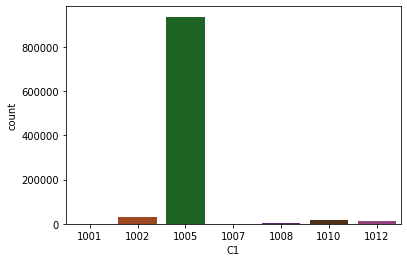

In [18]:
sns.countplot(x='C1',data=df_train, palette='dark')
plt.show();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e7c6810>],
      dtype=object)

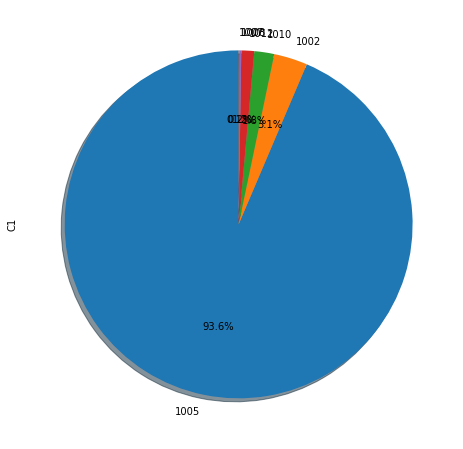

In [19]:
(df_train['C1'].value_counts()[:6]).plot.pie(figsize=(20,8),subplots=True,autopct='%1.1f%%',shadow=True, startangle=90)

We can see that about **93%** of values are **1005** and the lowest is **1001** which forms only **0.01%** of the column

In [20]:
df_train['C1'].size

1000000

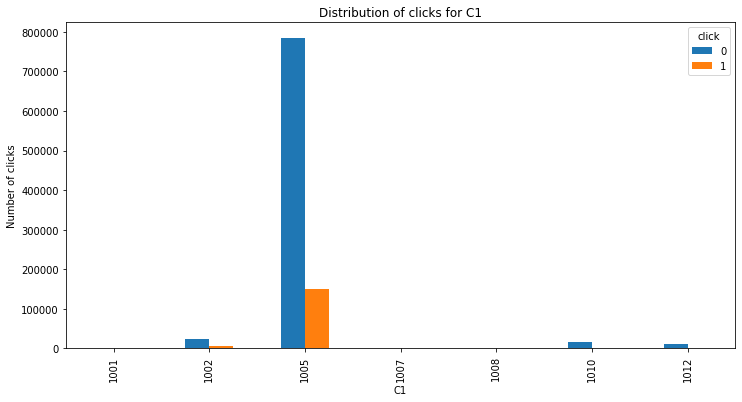

In [21]:
df_train.groupby(['C1','click']).size().unstack().plot(kind='bar',figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Distribution of clicks for C1');

From the graph, we can see that the **most number of clicks and unclicks are for 1005**. This is the relationship we have found for *'C1' and 'clicks'*

In [22]:
C1_values = df_train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=df_train.loc[np.where((df_train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.07476635514018691
for C1 value: 1002,  click through rate: 0.22819436881386335
for C1 value: 1005,  click through rate: 0.16149882673756108
for C1 value: 1007,  click through rate: 0.04327485380116959
for C1 value: 1008,  click through rate: 0.08765195137555983
for C1 value: 1010,  click through rate: 0.07507572479446127
for C1 value: 1012,  click through rate: 0.03239342061094327


In [23]:
list(C1_values)
CTR_C1 = pd.DataFrame({'C1':C1_values,'CTR':ctr_avg_list})
CTR_C1

,C1,CTR
0,1001,0.074766
1,1002,0.228194
2,1005,0.161499
3,1007,0.043275
4,1008,0.087652
5,1010,0.075076
6,1012,0.032393


Text(0.5, 1.0, 'CTR values for C1')

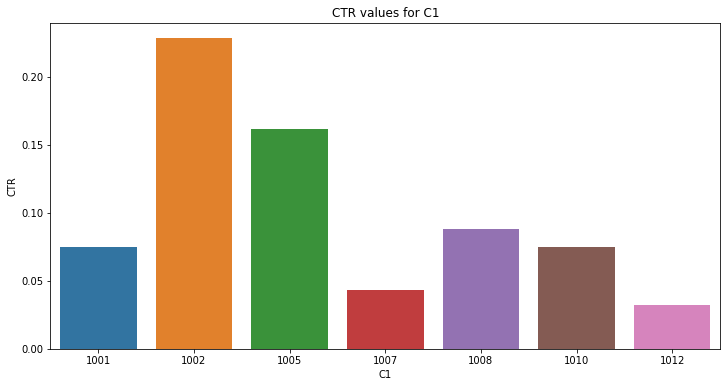

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR',x='C1', data = CTR_C1)
plt.title('CTR values for C1')

C1 is an an anonymous field with no description. From the graph, we have key observations below:

- **1002** : It is about 3% of the total C1 having CTR value 0.22.
- **1005** : It forms about 93% of all the values with CTR 0.16
- **1001** : It's around 0.01% and has CTR value 0.07

We can see that even if **1002** forms very less amount of data, it has relatively high CTR value like **1001**. **1005** has the highest contribution in data but has comparatively low CTR value. Thus, these 3 values are important for predicting CTR. 

### Banner position

It is beleived that banner position plays very vital role to convert an ad into a click. The performance of banner ad depends extremely on the banner position. Let's see how true it is.

In [25]:
(df_train['banner_pos'].value_counts()/len(df_train))*100

0    77.7714
1    22.0187
5     0.1563
2     0.0336
7     0.0150
4     0.0048
3     0.0002
Name: banner_pos, dtype: float64

In [26]:
df_train.loc[np.where((df_train.banner_pos == 3))]

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
715145,1.362287e+19,0,14102104,1012,3,1691,1750,16,2127,73,...,1,0,17894,320,50,2039,2,39,100077,32
741597,1.528406e+19,0,14102104,1005,3,1401,1923,6,2127,73,...,1,0,19251,320,50,2201,3,35,100195,43


We can see, there are just **2** rows for banner position **value 3**. So our output for the count of values is justified.

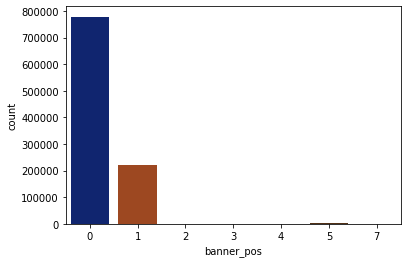

In [27]:
sns.countplot(x='banner_pos',data=df_train, palette='dark')
plt.show();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b66cdd0>],
      dtype=object)

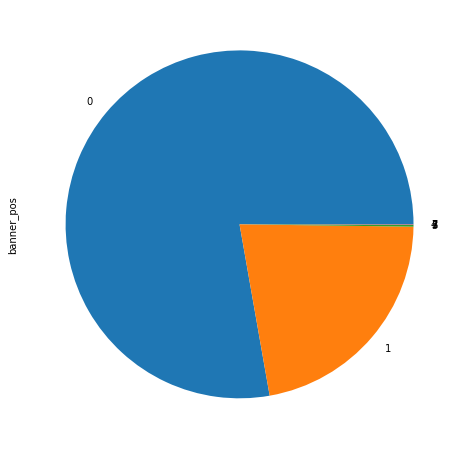

In [28]:
(df_train['banner_pos'].value_counts()).plot.pie(figsize=(20,8),subplots=True)

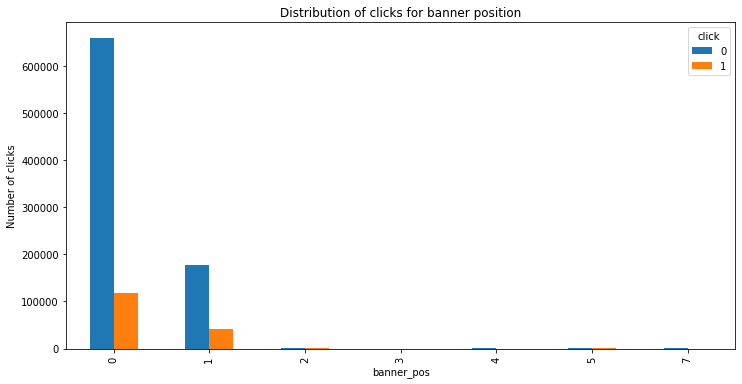

In [29]:
df_train.groupby(['banner_pos','click']).size().unstack().plot(kind='bar',figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Distribution of clicks for banner position');

In [30]:
pos_values = df_train.banner_pos.unique()
pos_values.sort()
ctr_avg_list=[]
for i in pos_values:
    ctr_avg=df_train.loc[np.where((df_train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for Banner pos value: {},  click through rate: {}".format(i,ctr_avg))

for Banner pos value: 0,  click through rate: 0.15153385434748506
for Banner pos value: 1,  click through rate: 0.19151448541467025
for Banner pos value: 2,  click through rate: 0.13988095238095238
for Banner pos value: 3,  click through rate: 0.0
for Banner pos value: 4,  click through rate: 0.14583333333333334
for Banner pos value: 5,  click through rate: 0.08765195137555983
for Banner pos value: 7,  click through rate: 0.06


In [31]:
list(pos_values)
CTR_pos = pd.DataFrame({'Banner pos':pos_values,'CTR':ctr_avg_list})
#CTR_pos['CTR'] = pd.DataFrame(ctr_avg_list) 
#CTR_pos['Banner pos'] = pd.DataFrame(pos_values)

CTR_pos

,Banner pos,CTR
0,0,0.151534
1,1,0.191514
2,2,0.139881
3,3,0.000000
4,4,0.145833
5,5,0.087652
6,7,0.060000


Text(0.5, 1.0, 'CTR values for Banner position')

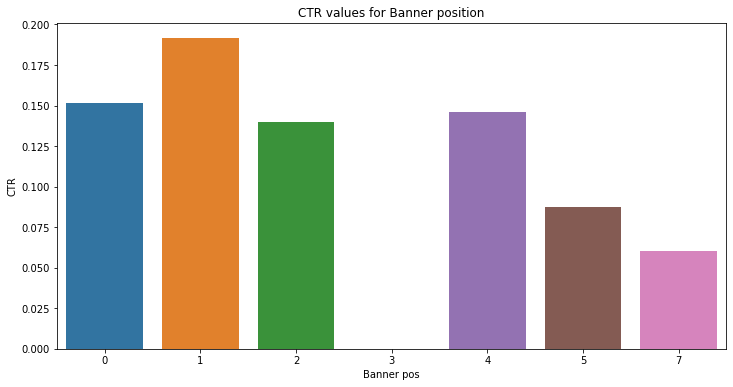

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR',x='Banner pos', data = CTR_pos)
plt.title('CTR values for Banner position')

From the above figures and graphs, we have following key observations:
- **'0'** : It is around 77% of the data with 0.15 CTR value
- **'1'** : It's about 22% of the total column and has CTR value of 0.19
- **'2' & '4'** : It has very less amount of data contribution but has CTR value 0.13 and 0.14
- **'3'** : We saw that there are just 2 rows of it with 0 clicks. Therefore we cannot see any values for it.

We can conclude from this observations that even if '2' and '4' contibutes to just 1% of column, its CTR values are  significantly high. Therefore, banner position of 2 and 4 should be focused more.

### Site Features



#### **Site Id**
<br>
We will start our analysis from site id.

In [33]:
df_train['site_id'].nunique()

2075

There are too many unique values. So we will take just top 10 site ids with most contribution.

In [34]:
Top_ids = (df_train['site_id'].value_counts()/len(df_train))[:10]
print('Top 10 site ids with highest contribution')
Top_ids

Top 10 site ids with highest contribution


1110    0.332893
260     0.232096
1751    0.038603
1813    0.032359
786     0.016455
738     0.016355
790     0.016064
1106    0.013231
589     0.009924
817     0.009011
Name: site_id, dtype: float64

In [35]:
top10_sites = df_train[(df_train.site_id.isin((df_train.site_id.value_counts()/len(df_train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]

In [36]:
top10_sites_click

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
8,1.000095e+19,1,14102100,1005,0,260,1927,2,2127,73,...,1,2,15707,320,50,1722,0,35,-1,79
23,1.000477e+19,1,14102100,1005,0,260,1927,2,2127,73,...,1,0,15701,320,50,1722,0,35,-1,79
27,1.000561e+19,1,14102100,1005,0,1110,1568,6,789,22,...,1,0,21611,320,50,2480,3,297,100111,61
32,1.000649e+19,1,14102100,1005,0,260,1927,2,2127,73,...,1,0,15708,320,50,1722,0,35,100083,79
37,1.000696e+19,1,14102100,1005,0,1110,1568,6,100,41,...,1,0,18993,320,50,2161,0,35,100034,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999968,1.474054e+19,1,14102105,1005,0,260,1927,2,2127,73,...,1,0,15705,320,50,1722,0,35,100084,79
999982,1.474133e+19,1,14102105,1005,0,1110,1568,6,523,22,...,1,0,19493,320,50,2229,0,687,100031,48
999984,1.474136e+19,1,14102105,1005,1,817,158,19,2127,73,...,1,0,16920,320,50,1899,0,431,100074,117
999986,1.474142e+19,1,14102105,1005,0,1110,1568,6,684,22,...,1,2,21666,320,50,2494,3,35,-1,112


Below we can see the graphical distribution of all the top 10 unique values

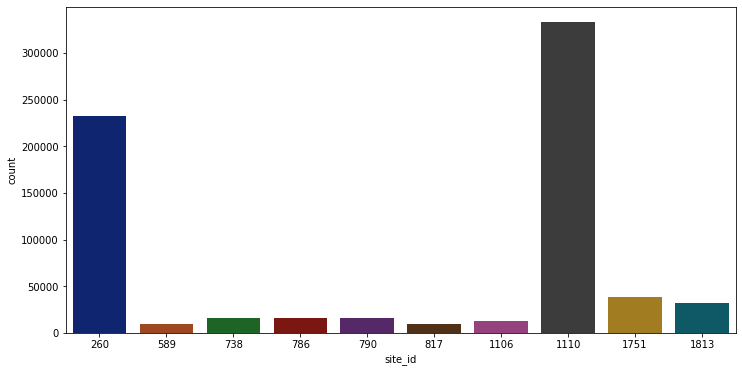

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='site_id',data=top10_sites, palette='dark')
plt.show();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cda6810>],
      dtype=object)

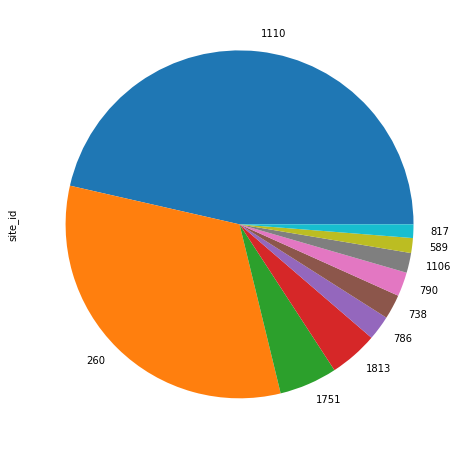

In [38]:
(df_train['site_id'].value_counts()[:10]).plot.pie(figsize=(20,8),subplots=True)

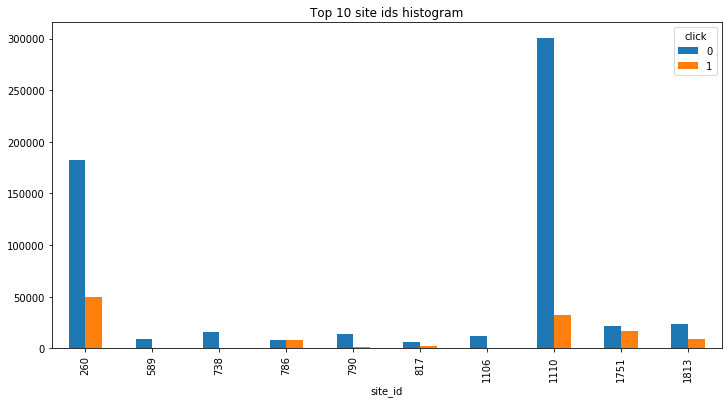

In [39]:
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram')

From the above graph, We can see that there are significant amount of clicks for **'1fbe01fe' and '85f751fd'** ids but maybe it is just because of the high volume of theses members in the column. We can also notice some more ids with significant amount of clicks even if their frequency is less. Now, let's take a look at the CTR values and decide further.

In [40]:
Top_ids = top10_sites.site_id.unique()
ctr_avg_list=[]
for i in Top_ids:
    ctr_avg=top10_sites.loc[np.where((top10_sites.site_id == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for Site Id : {},  click through rate value: {}".format(i,ctr_avg))

for Site Id : 260,  click through rate value: 0.17367028919633798
for Site Id : 1813,  click through rate value: 0.17423059061932705
for Site Id : 1110,  click through rate value: 0.17362123583857525
for Site Id : 1751,  click through rate value: 0.17069560927479033
for Site Id : 738,  click through rate value: 0.18062423996757196
for Site Id : 817,  click through rate value: 0.1753012048192771
for Site Id : 786,  click through rate value: 0.17871986699916875
for Site Id : 1106,  click through rate value: 0.1822217633698121
for Site Id : 589,  click through rate value: 0.17341040462427745
for Site Id : 790,  click through rate value: 0.1767776161547018


In [41]:
list(Top_ids)
CTR_SiteIds = pd.DataFrame({'Site Ids':Top_ids,'CTR':ctr_avg_list})

CTR_SiteIds

,Site Ids,CTR
0,260,0.173670
1,1813,0.174231
2,1110,0.173621
3,1751,0.170696
4,738,0.180624
5,817,0.175301
6,786,0.178720
7,1106,0.182222
8,589,0.173410
9,790,0.176778


Text(0.5, 1.0, 'CTR values for Top 10 Site Ids')

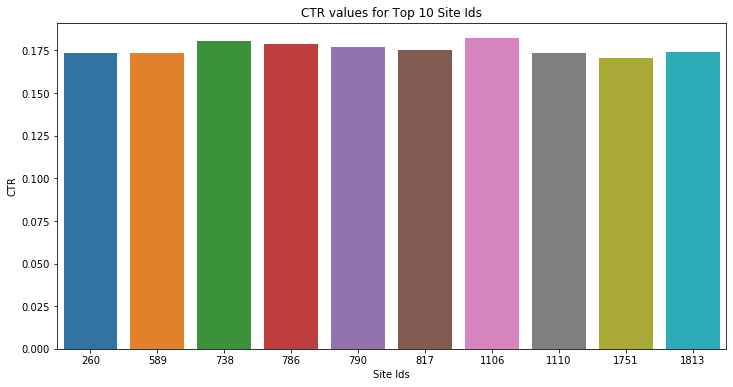

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR',x='Site Ids', data = CTR_SiteIds)
plt.title('CTR values for Top 10 Site Ids')

From the graph, we can observe that even though there is a large difference among all the unique site ids frequency in the column, the CTR values for all the site ids are almost equal. So, we can say that the frequency of ads should be increased for the other site ids like **'5b08c53b' and 'd9750ee7'** whose contibution in the column is much less than **'85f751fd' and '1fbe01fe'**.

#### Site Domains

In [43]:
df_train['site_domain'].nunique()

2030

As there are too many unique values, we will take top 10 site domains for a brief idea.

In [44]:
Top_site_domains = (df_train['site_domain'].value_counts()/len(df_train))[:10]
print('Top 10 site domains with highest contribution')
Top_site_domains

Top 10 site domains with highest contribution


1568    0.348412
1927    0.232096
1221    0.041031
1004    0.033718
945     0.023775
151     0.017007
1593    0.016355
309     0.013991
682     0.013231
158     0.009083
Name: site_domain, dtype: float64

In [45]:
top10_sitesdomains = df_train[(df_train.site_domain.isin((df_train.site_domain.value_counts()/len(df_train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]

In [46]:
top10_sites_click

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
8,1.000095e+19,1,14102100,1005,0,260,1927,2,2127,73,...,1,2,15707,320,50,1722,0,35,-1,79
23,1.000477e+19,1,14102100,1005,0,260,1927,2,2127,73,...,1,0,15701,320,50,1722,0,35,-1,79
27,1.000561e+19,1,14102100,1005,0,1110,1568,6,789,22,...,1,0,21611,320,50,2480,3,297,100111,61
32,1.000649e+19,1,14102100,1005,0,260,1927,2,2127,73,...,1,0,15708,320,50,1722,0,35,100083,79
37,1.000696e+19,1,14102100,1005,0,1110,1568,6,100,41,...,1,0,18993,320,50,2161,0,35,100034,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999968,1.474054e+19,1,14102105,1005,0,260,1927,2,2127,73,...,1,0,15705,320,50,1722,0,35,100084,79
999982,1.474133e+19,1,14102105,1005,0,1110,1568,6,523,22,...,1,0,19493,320,50,2229,0,687,100031,48
999984,1.474136e+19,1,14102105,1005,1,817,158,19,2127,73,...,1,0,16920,320,50,1899,0,431,100074,117
999986,1.474142e+19,1,14102105,1005,0,1110,1568,6,684,22,...,1,2,21666,320,50,2494,3,35,-1,112


Below we can see tha graphical representaion of all the top 10 site domains with highest contribution.

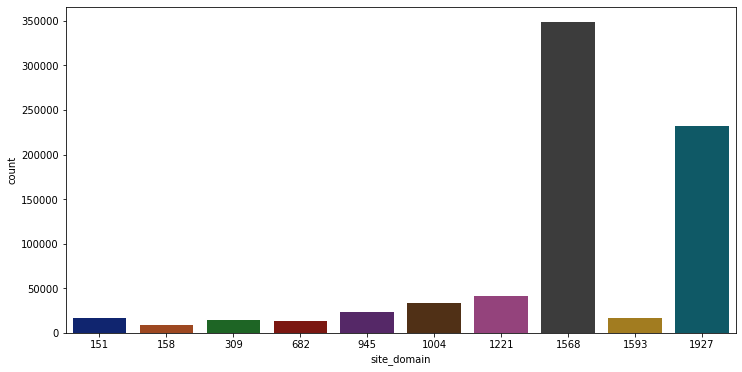

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x='site_domain',data=top10_sitesdomains, palette='dark')
plt.show();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bf9aa50>],
      dtype=object)

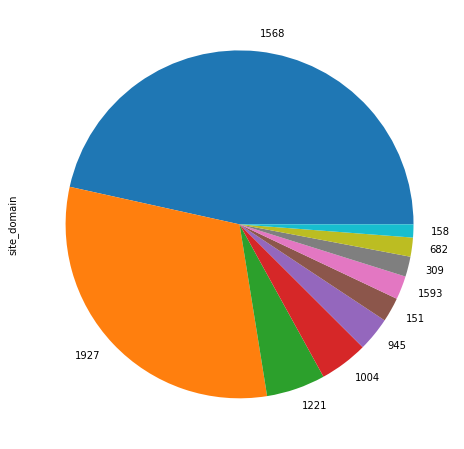

In [48]:
(df_train['site_domain'].value_counts()[:10]).plot.pie(figsize=(20,8),subplots=True)

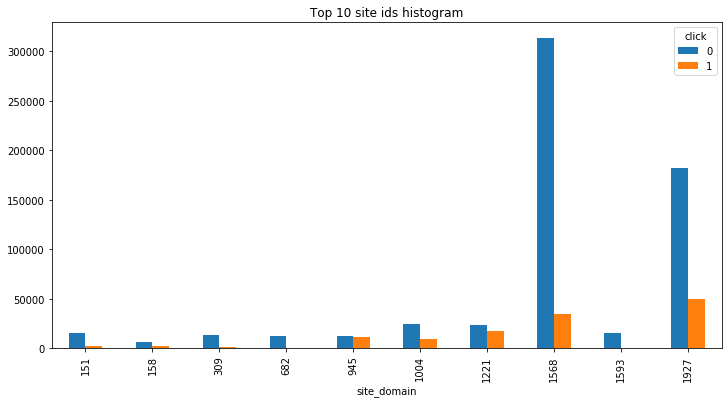

In [49]:
top10_sitesdomains.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram');

From the above graphs and figures, We can see that there are significant amount of clicks for **'f3845767' and 'c4e18dd6'** ids but maybe it is just because of the high volume of theses members in the column. We can also notice some more ids with significant amount of clicks even if their frequency is less. Now, let's take a look at the CTR values and decide further.

In [50]:
Top_site_domains = top10_sitesdomains.site_domain.unique()[:10]
list(Top_site_domains)
ctr_avg_list=[]
for i in Top_site_domains:
    ctr_avg=top10_sitesdomains.loc[np.where((top10_sitesdomains.site_domain == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for Site domain value: {},  click through rate: {}".format(i,ctr_avg))

for Site domain value: 1927,  click through rate: 0.17683903121053582
for Site domain value: 1004,  click through rate: 0.17649818224463468
for Site domain value: 1568,  click through rate: 0.17514680450770606
for Site domain value: 1221,  click through rate: 0.17619277108433734
for Site domain value: 309,  click through rate: 0.1774957378291343
for Site domain value: 1593,  click through rate: 0.18437769586699082
for Site domain value: 158,  click through rate: 0.17844677137870854
for Site domain value: 945,  click through rate: 0.1773746116289392
for Site domain value: 682,  click through rate: 0.17944616615015496
for Site domain value: 151,  click through rate: 0.17656177336847


In [51]:
list(Top_site_domains)
CTR_SiteDomain = pd.DataFrame({'Site Domain':Top_ids,'CTR':ctr_avg_list})

CTR_SiteDomain

,Site Domain,CTR
0,260,0.176839
1,1813,0.176498
2,1110,0.175147
3,1751,0.176193
4,738,0.177496
5,817,0.184378
6,786,0.178447
7,1106,0.177375
8,589,0.179446
9,790,0.176562


Text(0.5, 1.0, 'CTR values for Top 10 Site Domains')

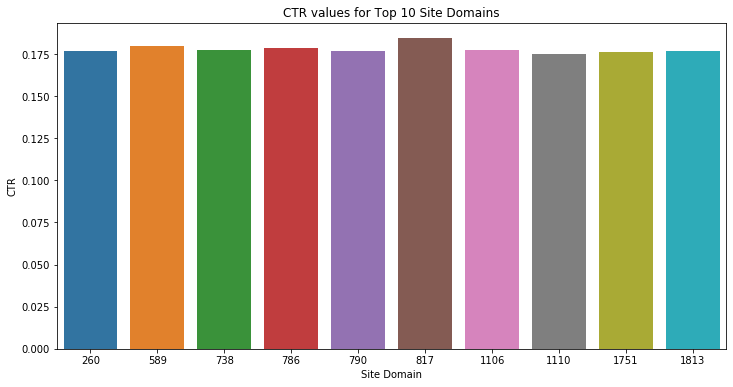

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR',x='Site Domain', data = CTR_SiteDomain)
plt.title('CTR values for Top 10 Site Domains')

From the above graphs and figures, we can say that like site id, site domain also has almost equal CTR values for all the top 10 domains inspite of the amount of contributions towards the column's data. So, we can say that the frequency of ads should be increased for the other site domains like **'c7ca3108' and '58a89a43'** whose contibution in the column is much less than **'c4e18dd6' and 'f3845767'**.

#### Site Category

In [53]:
df_train['site_category'].nunique()

21

In [54]:
Top_site_category = (df_train['site_category'].value_counts()/len(df_train))*100
Top_site_category

6     36.0056
2     26.2519
19    26.0471
4      7.5062
20     0.8842
11     0.7880
3      0.7251
8      0.4961
0      0.4505
10     0.3958
9      0.2705
16     0.0552
17     0.0508
14     0.0374
18     0.0281
15     0.0025
12     0.0022
5      0.0013
7      0.0010
13     0.0004
1      0.0001
Name: site_category, dtype: float64

Below is the graphical representation of the contribution of each unique value in the column.

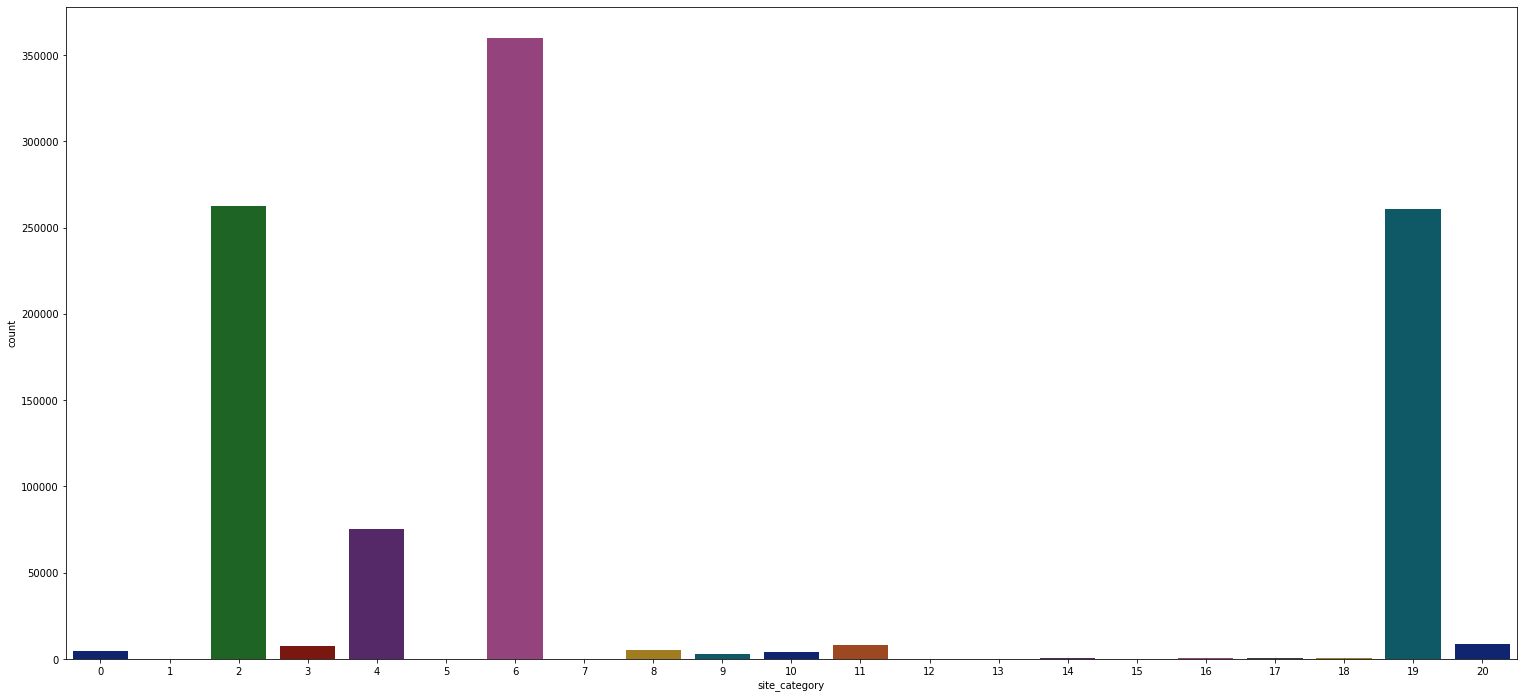

In [55]:
plt.figure(figsize=(26,12))
sns.countplot(x='site_category',data=df_train, palette='dark')
plt.show();

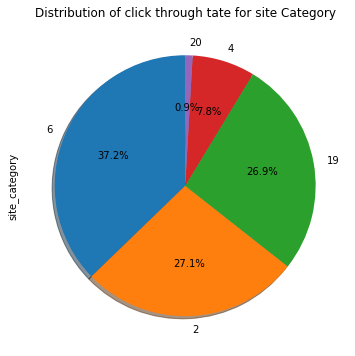

In [56]:
(df_train['site_category'].value_counts()[:5]).plot.pie(figsize=(12,6),subplots=True,autopct='%1.1f%%',shadow=True, startangle=90 )
plt.title('Distribution of click through tate for site Category');

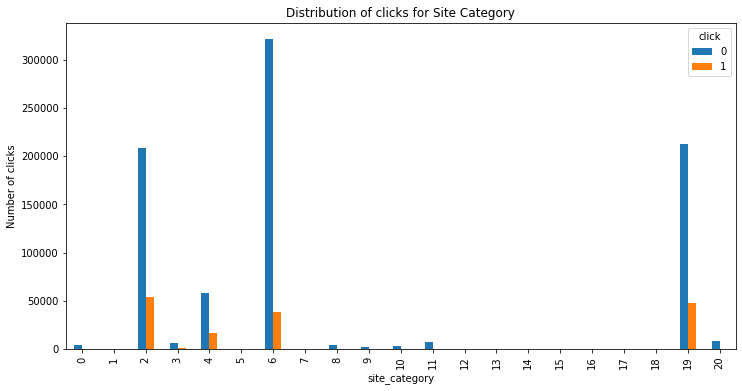

In [57]:
df_train.groupby(['site_category','click']).size().unstack().plot(kind='bar',figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Distribution of clicks for Site Category');

From the above graphs and figures, We can see that there are significant amount of clicks for **'50e219e0', '28905ebd' and 'f028772b'** ids but maybe it is just because of the high volume of theses members in the column. We can also notice some more ids with significant amount of clicks even if their frequency is less. Now, let's take a look at the CTR values and decide further.

In [58]:
site_cat_values = df_train.site_category.unique()
site_cat_values.sort()
ctr_avg_list=[]
for i in site_cat_values:
    ctr_avg=df_train.loc[np.where((df_train.site_category == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for Site Category value: {},  click through rate: {}".format(i,ctr_avg))

for Site Category value: 0,  click through rate: 0.0293007769145394
for Site Category value: 1,  click through rate: 0.0
for Site Category value: 2,  click through rate: 0.2063507784198477
for Site Category value: 3,  click through rate: 0.1066059853813267
for Site Category value: 4,  click through rate: 0.22313554128587035
for Site Category value: 5,  click through rate: 0.3076923076923077
for Site Category value: 6,  click through rate: 0.10638345146310574
for Site Category value: 7,  click through rate: 0.1
for Site Category value: 8,  click through rate: 0.12819995968554726
for Site Category value: 9,  click through rate: 0.11386321626617375
for Site Category value: 10,  click through rate: 0.15790803436078826
for Site Category value: 11,  click through rate: 0.03857868020304569
for Site Category value: 12,  click through rate: 0.09090909090909091
for Site Category value: 13,  click through rate: 0.0
for Site Category value: 14,  click through rate: 0.0
for Site Category value: 15,

In [59]:
list(site_cat_values)
CTR_site_cat = pd.DataFrame({'Site Category':site_cat_values,'CTR':ctr_avg_list})
CTR_site_cat

,Site Category,CTR
0,0,0.029301
1,1,0.000000
2,2,0.206351
3,3,0.106606
4,4,0.223136
5,5,0.307692
6,6,0.106383
7,7,0.100000
8,8,0.128200
9,9,0.113863


Text(0.5, 1.0, 'CTR values for Site Categories')

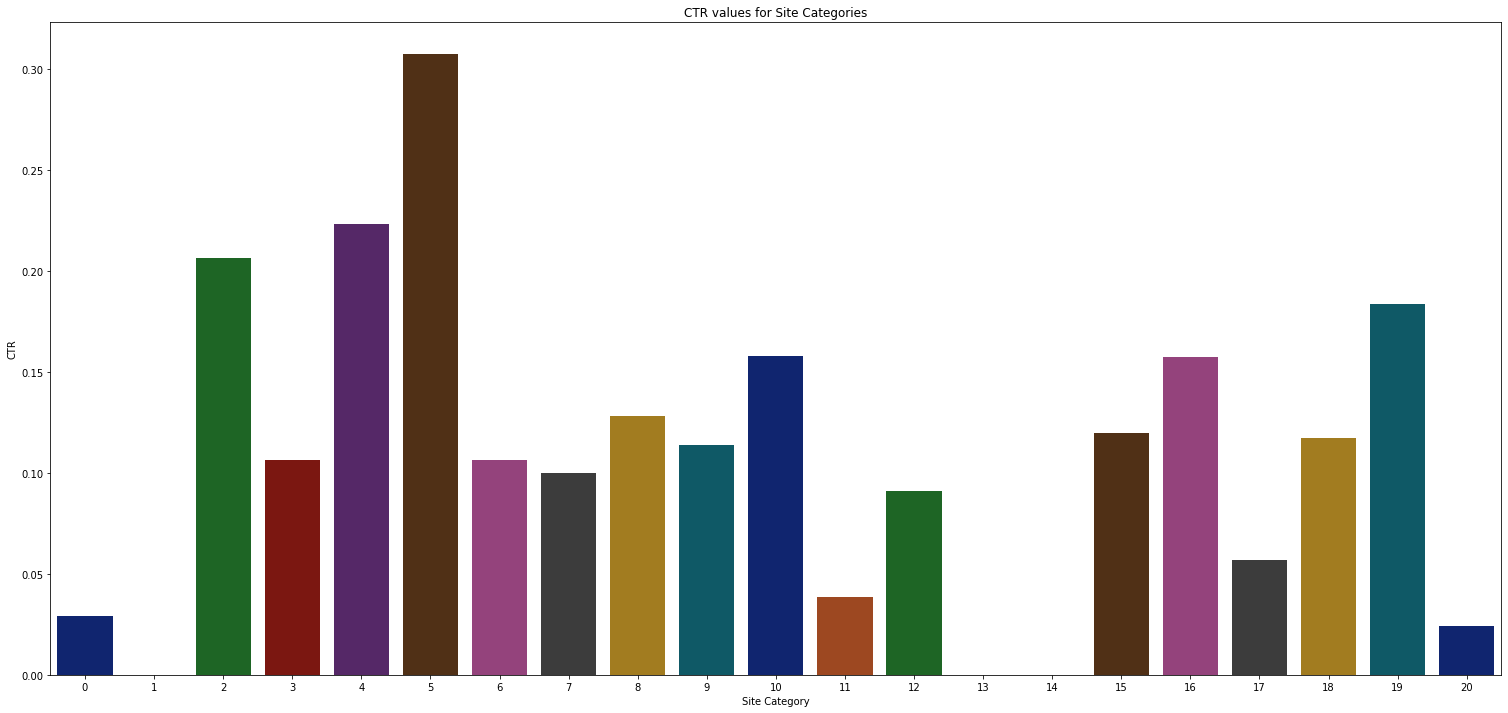

In [60]:
plt.figure(figsize=(26,12))
sns.barplot(y='CTR',x='Site Category', data = CTR_site_cat, palette ='dark')
plt.title('CTR values for Site Categories')

From the above graphs and figures, we can say that like site id and site domain, site category also has significant CTR values for various categories despite the amount of contributions towards the column's data. Specifically, **'42a36e14'** has very less frequency but its CTR value is the highest which shows that frequency of ads should be increased as there are high chances of getting clicks and same can be observed about **'75fa27f6'**. Moreover, **'50e219e0'** has around 33% of data in the column but its CTR value is very less as compared to other unique values.

### App Features

In [61]:
print('There are {} unique App ids'.format(df_train['app_id'].nunique()))
print('There are {} unique App domains'.format(df_train['app_domain'].nunique()))
print('There are {} unique App categories'.format(df_train['app_category'].nunique()))

There are 2309 unique App ids
There are 156 unique App domains
There are 23 unique App categories


There are too many unique values for App id and App domains. So, we will use App category to explore App features.

In [62]:
Top_app_category = (df_train['app_category'].value_counts()/len(df_train))*100
Top_app_category

0     67.9869
3     22.5789
13     2.9806
21     2.8765
18     2.5260
19     0.4302
22     0.1436
10     0.1410
1      0.1108
8      0.0943
12     0.0373
20     0.0367
15     0.0214
4      0.0147
17     0.0057
7      0.0054
14     0.0031
6      0.0025
2      0.0014
9      0.0013
16     0.0011
11     0.0004
5      0.0002
Name: app_category, dtype: float64

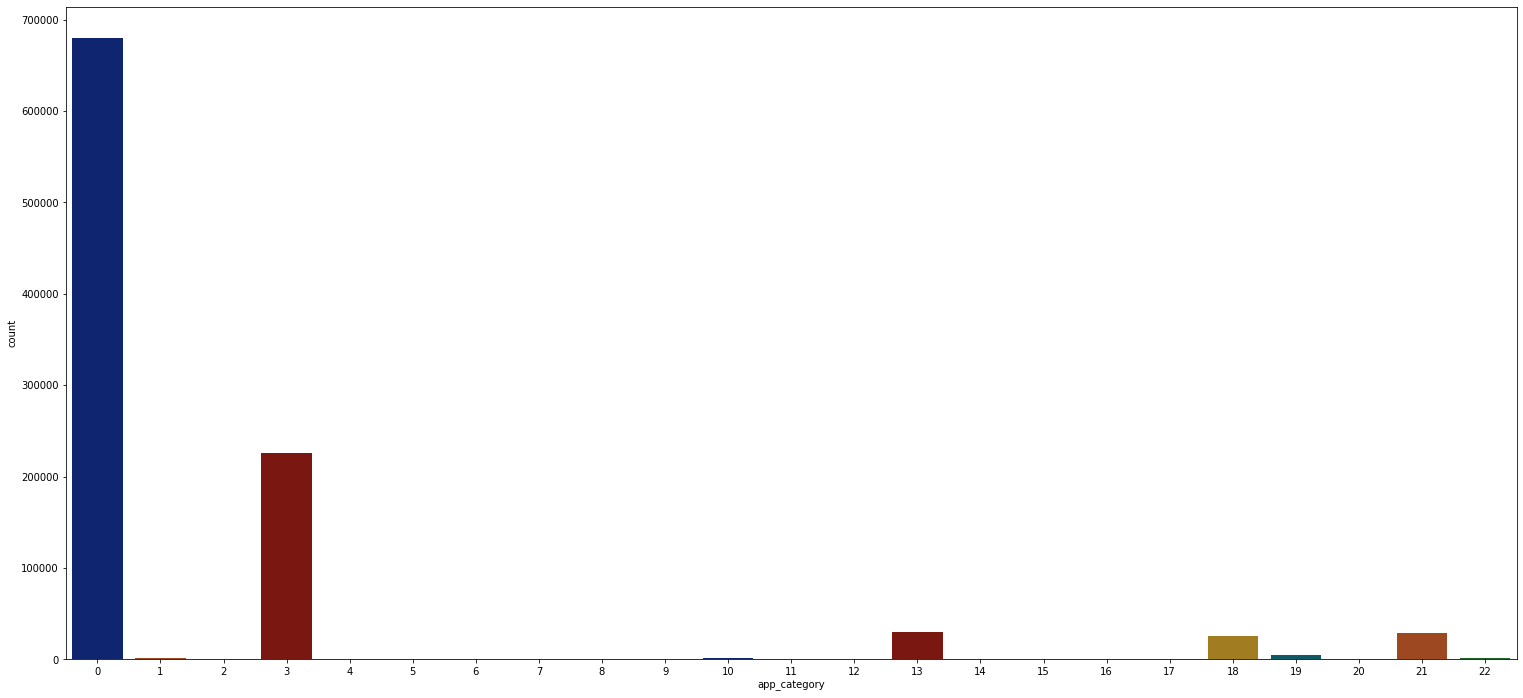

In [63]:
plt.figure(figsize=(26,12))
sns.countplot(x='app_category',data=df_train, palette='dark')
plt.show();

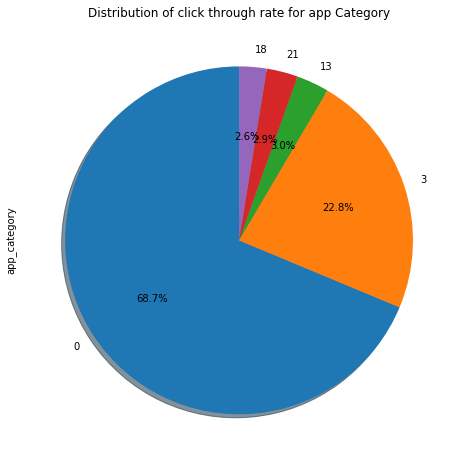

In [64]:
(df_train['app_category'].value_counts()[:5]).plot.pie(figsize=(16,8),autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Distribution of click through rate for app Category');

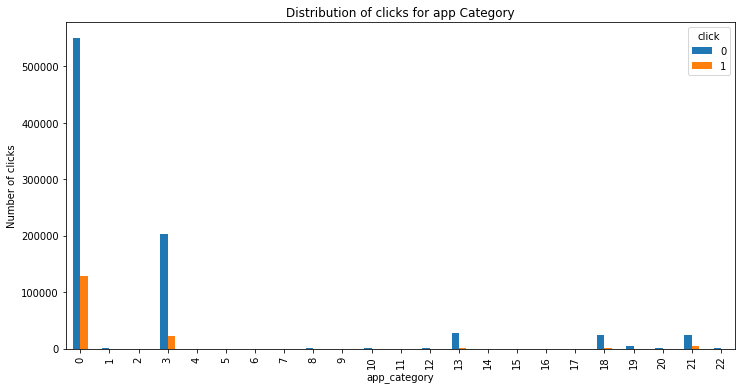

In [65]:
df_train.groupby(['app_category','click']).size().unstack().plot(kind='bar', figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Distribution of clicks for app Category');

From the above graphs and figures, We can see that there are significant amount of clicks for **'07d7df22' and '0f2161f8'** categories but maybe it is just because of the high volume of theses members in the column. We can also notice some more categories with significant amount of clicks even if their frequency is less. Now, let's take a look at the CTR values and decide further.

In [66]:
app_cat_values = df_train.app_category.unique()
app_cat_values.sort()
ctr_avg_list=[]
for i in app_cat_values:
    ctr_avg=df_train.loc[np.where((df_train.app_category == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for App Category value: {},  click through rate: {}".format(i,ctr_avg))

for App Category value: 0,  click through rate: 0.19034843477199284
for App Category value: 1,  click through rate: 0.06859205776173286
for App Category value: 2,  click through rate: 0.0
for App Category value: 3,  click through rate: 0.10260464415892714
for App Category value: 4,  click through rate: 0.06802721088435375
for App Category value: 5,  click through rate: 0.5
for App Category value: 6,  click through rate: 0.0
for App Category value: 7,  click through rate: 0.16666666666666666
for App Category value: 8,  click through rate: 0.05726405090137858
for App Category value: 9,  click through rate: 0.07692307692307693
for App Category value: 10,  click through rate: 0.07801418439716312
for App Category value: 11,  click through rate: 0.5
for App Category value: 12,  click through rate: 0.08310991957104558
for App Category value: 13,  click through rate: 0.05968596926793263
for App Category value: 14,  click through rate: 0.1935483870967742
for App Category value: 15,  click throu

In [67]:
list(app_cat_values)
CTR_app_cat = pd.DataFrame({'App Category':app_cat_values,'CTR':ctr_avg_list})
CTR_app_cat

,App Category,CTR
0,0,0.190348
1,1,0.068592
2,2,0.000000
3,3,0.102605
4,4,0.068027
5,5,0.500000
6,6,0.000000
7,7,0.166667
8,8,0.057264
9,9,0.076923


Text(0.5, 1.0, 'CTR values for App Categories')

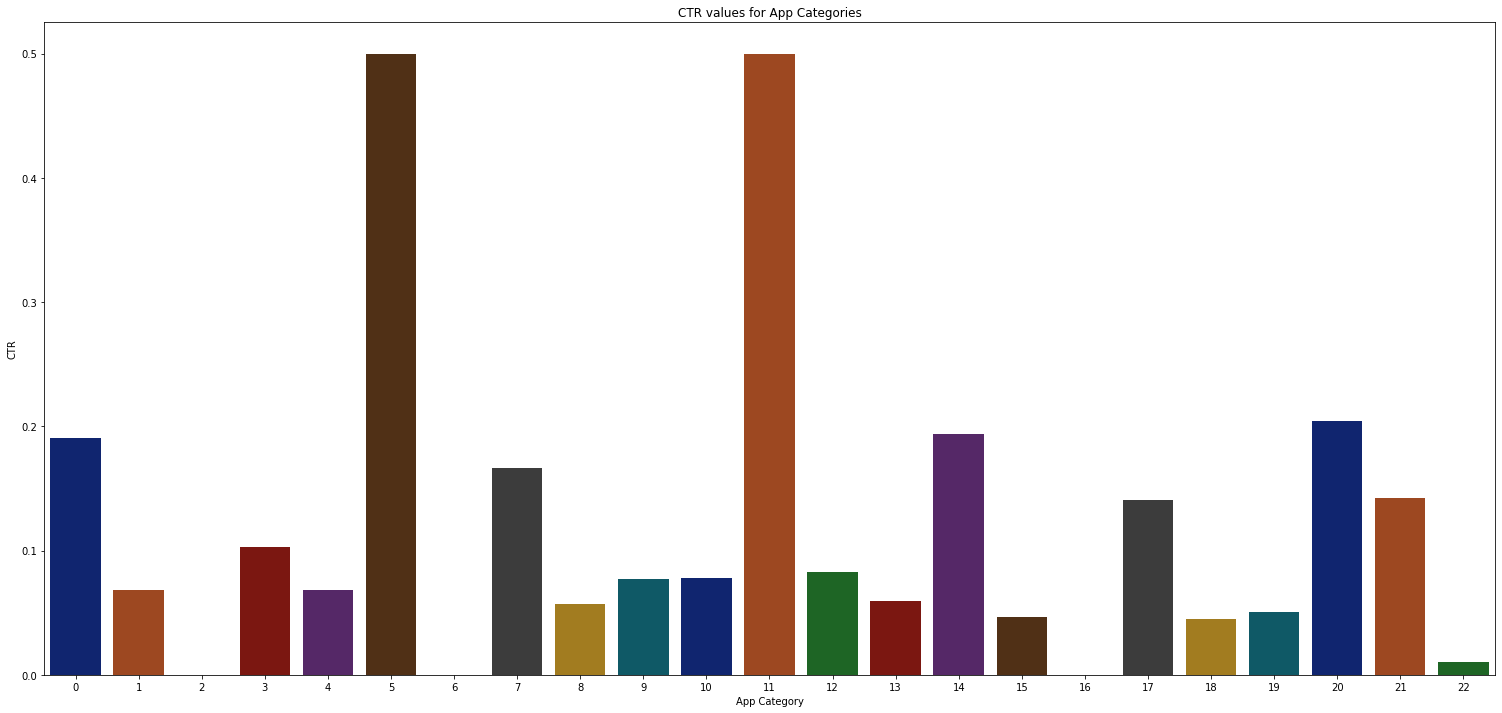

In [68]:
plt.figure(figsize=(26,12))
sns.barplot(y='CTR',x='App Category', data = CTR_app_cat, palette ='dark')
plt.title('CTR values for App Categories')

In [69]:
df_train.loc[np.where((df_train.app_category == '18b1e0be'))]

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21


In [70]:
df_train.loc[np.where((df_train.app_category == '79f0b860'))]

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21


From the graph, we can see that **'18b1e0be' and '79f0b860'** have the highest CRT value but as there are just 2 and 4 rows of these values, we cannot provide strong conclusions about these app categories. Though, we can say that other app categories like **'8df2e842' and 'dc97ec06'** with less frequency have significant CRT value and therefore should be considered to display more ads.

### Device Features

In [71]:
print('There are {} unique Device ids'.format(df_train['device_id'].nunique()))
print('There are {} unique Device ip'.format(df_train['device_ip'].nunique()))
print('There are {} unique Device model'.format(df_train['device_model'].nunique()))
print('There are {} unique Device type'.format(df_train['device_type'].nunique()))
print('There are {} unique Device connection type'.format(df_train['device_conn_type'].nunique()))

There are 83431 unique Device ids
There are 313002 unique Device ip
There are 4581 unique Device model
There are 4 unique Device type
There are 4 unique Device connection type


#### **Device Ids**
<br>
There are too many unique members for this column. we will have a breif look at it just as the other features.

In [72]:
Top_device_id = (df_train['device_id'].value_counts()/len(df_train))[:10]
Top_device_id

55298    0.840265
63767    0.001310
48047    0.000482
16201    0.000292
39271    0.000274
57554    0.000267
75817    0.000246
70670    0.000214
78580    0.000195
72184    0.000155
Name: device_id, dtype: float64

In [73]:
device_id_values = df_train.device_id.unique()[:10]
list(device_id_values)
ctr_avg_list=[]
for i in device_id_values:
    ctr_avg=df_train.loc[np.where((df_train.device_id == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for Device Ids value: {},  click through rate: {}".format(i,ctr_avg))

for Device Ids value: 55298,  click through rate: 0.16940846042617508
for Device Ids value: 63767,  click through rate: 0.44198473282442746
for Device Ids value: 81901,  click through rate: 0.07692307692307693
for Device Ids value: 50523,  click through rate: 0.07608695652173914
for Device Ids value: 34792,  click through rate: 0.0
for Device Ids value: 24383,  click through rate: 0.0
for Device Ids value: 21836,  click through rate: 0.0
for Device Ids value: 44718,  click through rate: 0.0
for Device Ids value: 38646,  click through rate: 0.5
for Device Ids value: 53077,  click through rate: 0.0


In [74]:

CTR_device_id = pd.DataFrame({'Device Ids':device_id_values,'CTR':ctr_avg_list})
CTR_device_id

,Device Ids,CTR
0,55298,0.169408
1,63767,0.441985
2,81901,0.076923
3,50523,0.076087
4,34792,0.000000
5,24383,0.000000
6,21836,0.000000
7,44718,0.000000
8,38646,0.500000
9,53077,0.000000


In [75]:
device_id_values

array([55298, 63767, 81901, 50523, 34792, 24383, 21836, 44718, 38646,
       53077])

Text(0.5, 1.0, 'CTR values for App Categories')

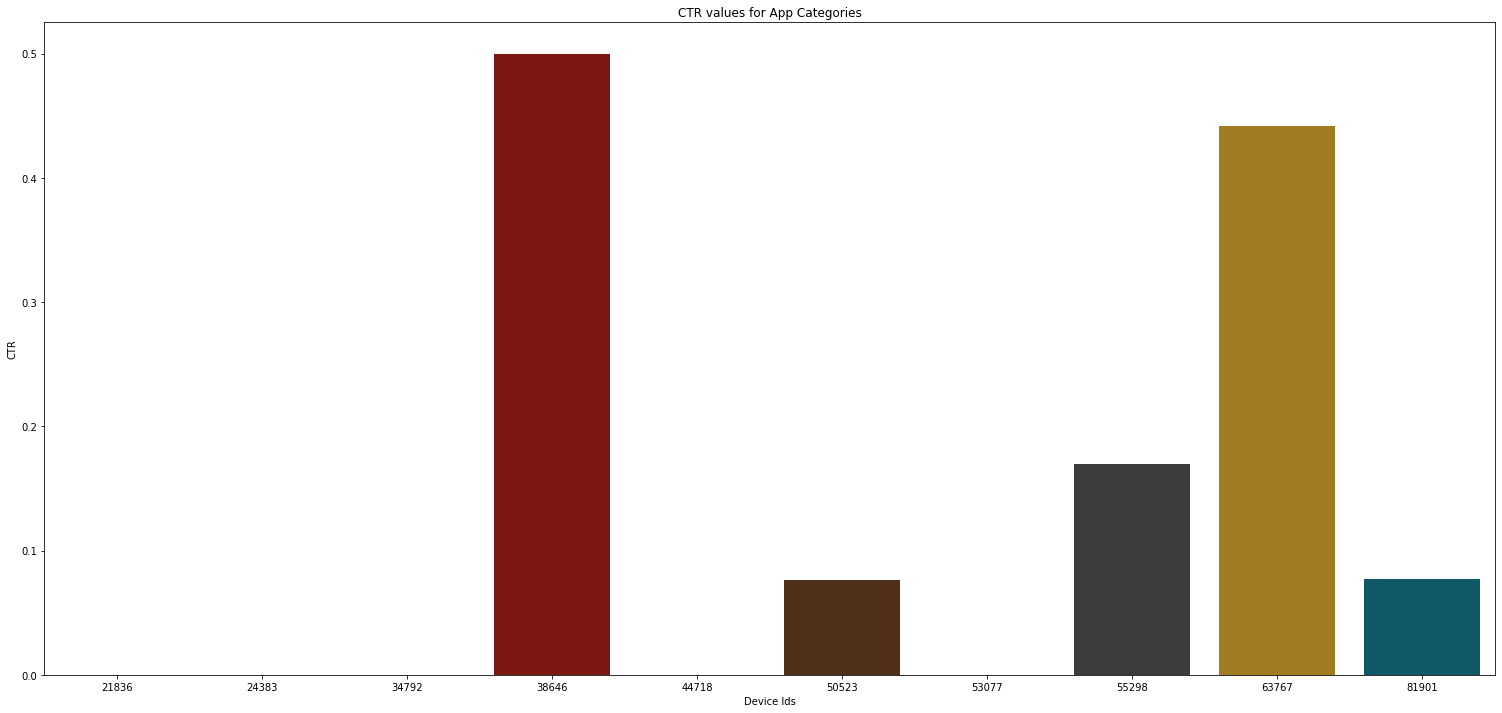

In [76]:
plt.figure(figsize=(26,12))
sns.barplot(y='CTR',x='Device Ids', data = CTR_device_id, palette ='dark')
plt.title('CTR values for App Categories')

The graph follows the same pattern as that of the other features explored till now. The ids with less frequency have a significant CRT value but because of its less frequency these assumptions are needed to be validated first.

#### Device Type
<br>
As we have seen in the beginning of Device Feature, device type field has 4 unique values. Lets explore and evaluate these values.

In [77]:
Device_type = (df_train['device_type'].value_counts()/len(df_train))*100
Device_type

1    95.0293
0     3.1219
4     1.7193
5     0.1295
Name: device_type, dtype: float64

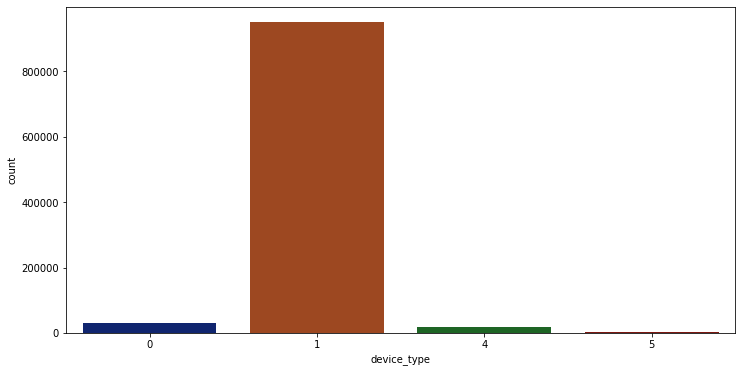

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(x='device_type',data=df_train, palette='dark')
plt.show();

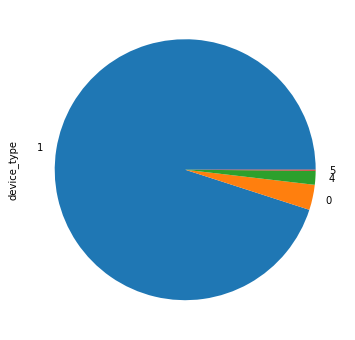

In [79]:
(df_train['device_type'].value_counts()).plot.pie(figsize=(12,6))

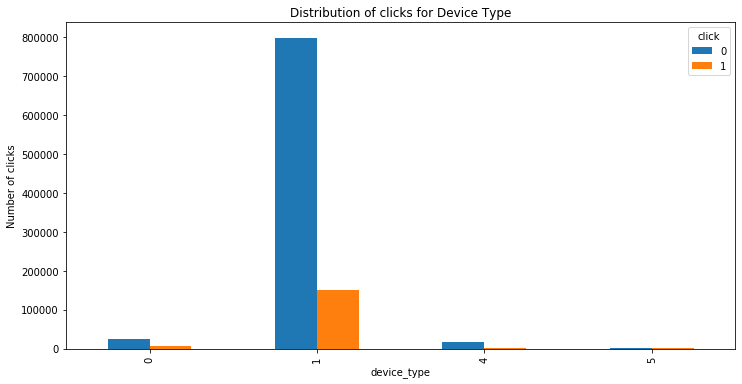

In [80]:
df_train.groupby(['device_type','click']).size().unstack().plot(kind='bar', figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Distribution of clicks for Device Type');

From the above graphs and figures, We can see that there are significant amount of clicks for **'1'** device type but maybe it is just because of the high volume of it in the column. We can also notice some more device types with significant amount of clicks even if their frequency is less. Now, let's take a look at the CTR values and decide further.

In [81]:
dev_type_values = df_train.device_type.unique()
list(dev_type_values)
ctr_avg_list=[]
for i in dev_type_values:
    ctr_avg=df_train.loc[np.where((df_train.device_type == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for device_type value: {},  click through rate: {}".format(i,ctr_avg))

for device_type value: 1,  click through rate: 0.15964234188823867
for device_type value: 0,  click through rate: 0.22819436881386335
for device_type value: 4,  click through rate: 0.07468155644739138
for device_type value: 5,  click through rate: 0.08030888030888031


In [82]:

CTR_dev_type = pd.DataFrame({'Device Type':dev_type_values,'CTR':ctr_avg_list})
CTR_dev_type

,Device Type,CTR
0,1,0.159642
1,0,0.228194
2,4,0.074682
3,5,0.080309


Text(0.5, 1.0, 'CTR values for Device Type')

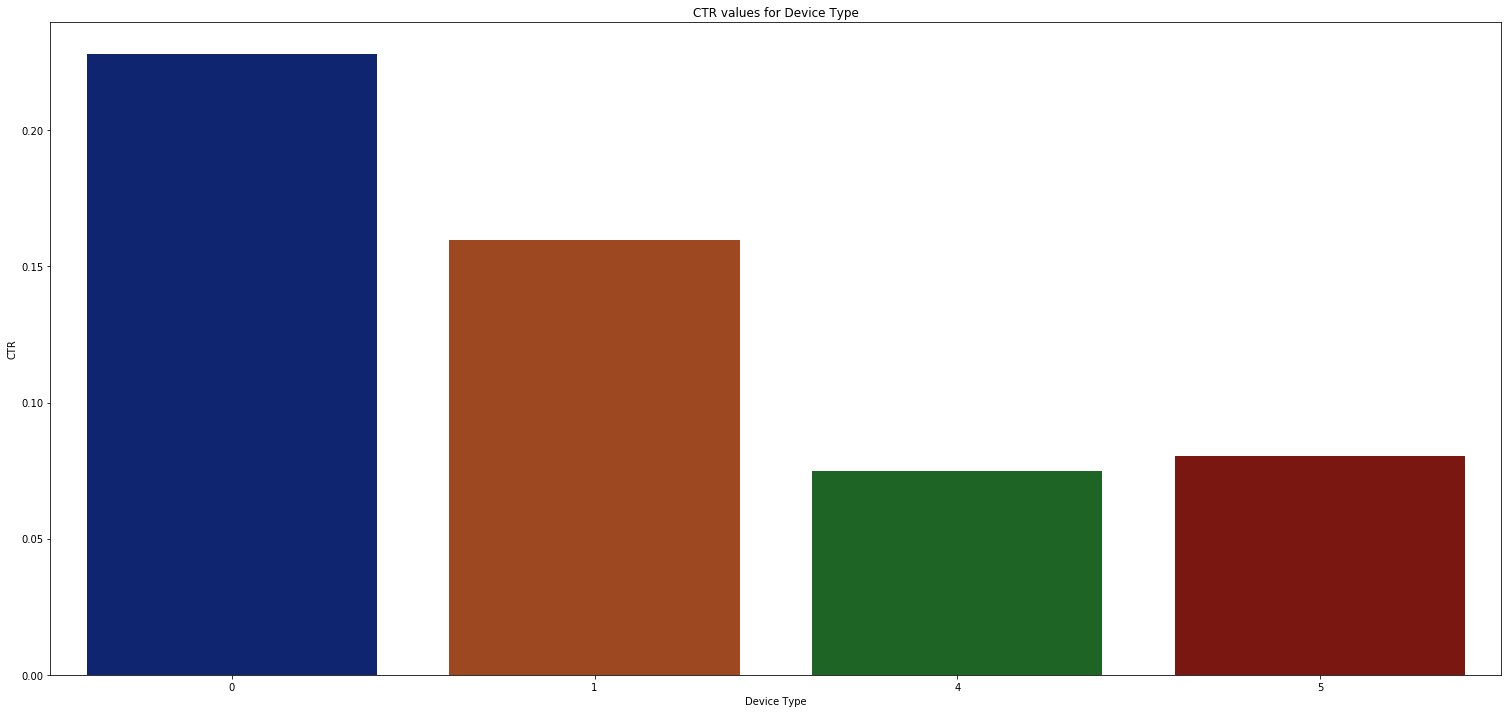

In [83]:
plt.figure(figsize=(26,12))
sns.barplot(y='CTR',x='Device Type', data = CTR_dev_type, palette ='dark')
plt.title('CTR values for Device Type')

It can be noticed that device types with less data have good CTR values as compared to device type '1'. The device type '0' which has very less frequency in the column has highest CTR. 

#### Device Connection Type

In [84]:
df_train['device_conn_type'].nunique()

4

In [85]:
Device_type = (df_train['device_type'].value_counts()/len(df_train))*100
Device_type

1    95.0293
0     3.1219
4     1.7193
5     0.1295
Name: device_type, dtype: float64

In [86]:
dev_conn_type_values = df_train.device_conn_type.unique()
list(dev_conn_type_values)
ctr_avg_list=[]
for i in dev_conn_type_values:
    ctr_avg=df_train.loc[np.where((df_train.device_conn_type == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for Device connection Type value: {},  click through rate: {}".format(i,ctr_avg))

for Device connection Type value: 2,  click through rate: 0.11713835623879625
for Device connection Type value: 0,  click through rate: 0.16577997552107063
for Device connection Type value: 3,  click through rate: 0.08230523682167198
for Device connection Type value: 5,  click through rate: 0.03666666666666667


In [87]:
CTR_dev_conn_type = pd.DataFrame({'Device Connection Type':dev_conn_type_values,'CTR':ctr_avg_list})
CTR_dev_conn_type

,Device Connection Type,CTR
0,2,0.117138
1,0,0.165780
2,3,0.082305
3,5,0.036667


Text(0.5, 1.0, 'CTR values for Device Connection Type')

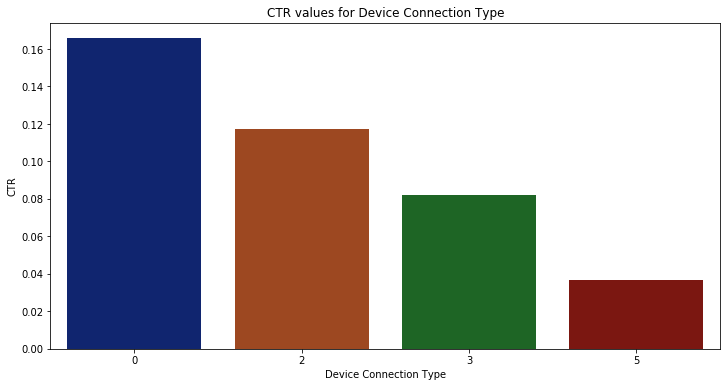

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR',x='Device Connection Type', data = CTR_dev_conn_type, palette ='dark')
plt.title('CTR values for Device Connection Type')

Observation is similar to Device type. The connection types which are not used frequently have significant CRT.

In [89]:
print("There are {} unique C14 values ".format(df_train.C14.nunique()))
print("There are {} unique C15 values ".format(df_train.C15.nunique()))
print("There are {} unique C16 values ".format(df_train.C16.nunique()))
print("There are {} unique C17 values ".format(df_train.C17.nunique()))
print("There are {} unique C18 values ".format(df_train.C18.nunique()))
print("There are {} unique C19 values ".format(df_train.C19.nunique()))
print("There are {} unique C20 values ".format(df_train.C20.nunique()))
print("There are {} unique C21 values ".format(df_train.C21.nunique()))

There are 606 unique C14 values 
There are 8 unique C15 values 
There are 9 unique C16 values 
There are 162 unique C17 values 
There are 4 unique C18 values 
There are 41 unique C19 values 
There are 161 unique C20 values 
There are 35 unique C21 values 


In [90]:
top10_C14 = df_train[(df_train.C14.isin((df_train.C14.value_counts()/len(df_train))[0:10].index))]
top10_C14_click = top10_C14[top10_C14['click'] == 1]

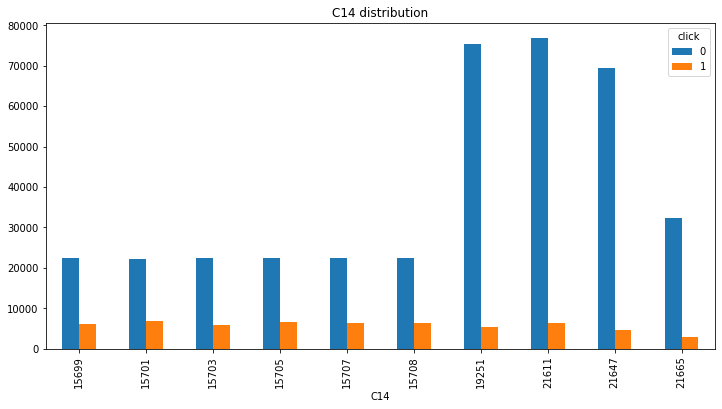

In [91]:
top10_C14.groupby(['C14','click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C14 distribution')

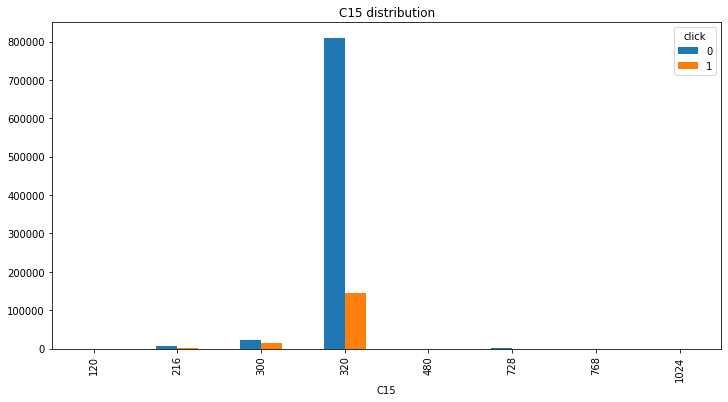

In [92]:
df_train.groupby(['C15','click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C15 distribution')

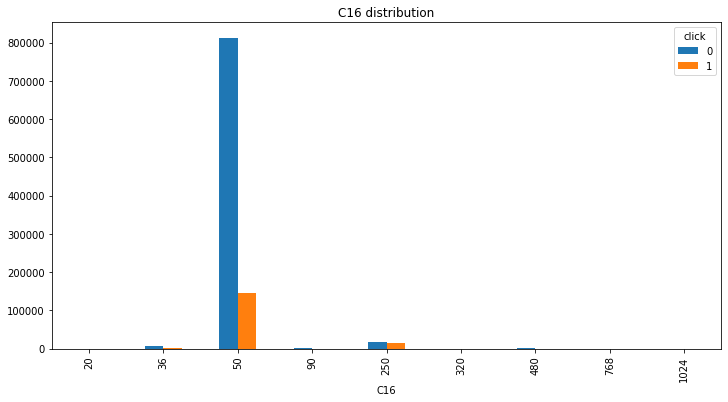

In [93]:
df_train.groupby(['C16', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C16 distribution');

In [94]:
top10_C17 = df_train[(df_train.C17.isin((df_train.C17.value_counts()/len(df_train))[0:10].index))]
top10_C17_click = top10_C17[top10_C17['click'] == 1]

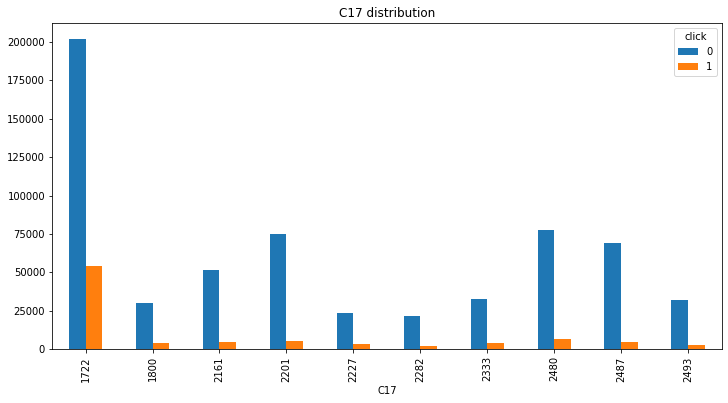

In [95]:
top10_C17.groupby(['C17','click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C17 distribution')

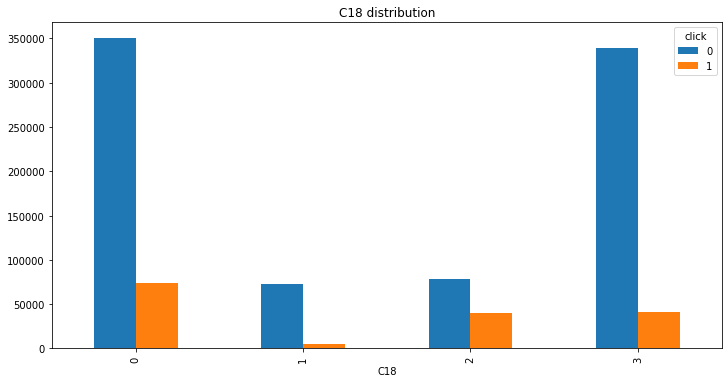

In [96]:
df_train.groupby(['C18','click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C18 distribution')

In [97]:
top10_C19 = df_train[(df_train.C19.isin((df_train.C19.value_counts()/len(df_train))[0:10].index))]
top10_C19_click = top10_C19[top10_C19['click'] == 1]

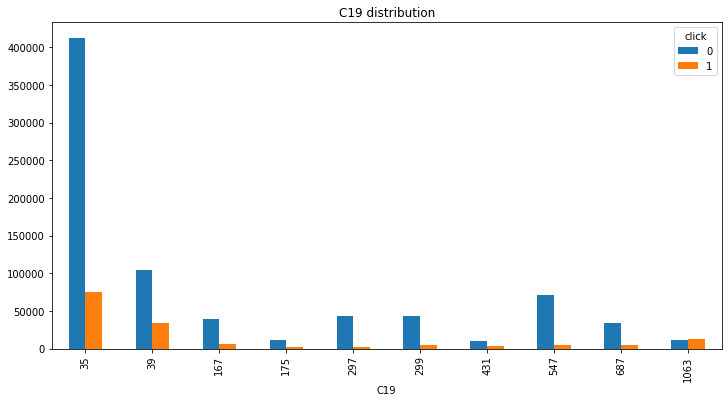

In [98]:
top10_C19.groupby(['C19','click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C19 distribution')

In [99]:
top10_C20 = df_train[(df_train.C20.isin((df_train.C20.value_counts()/len(df_train))[0:10].index))]
top10_C20_click = top10_C20[top10_C20['click'] == 1]

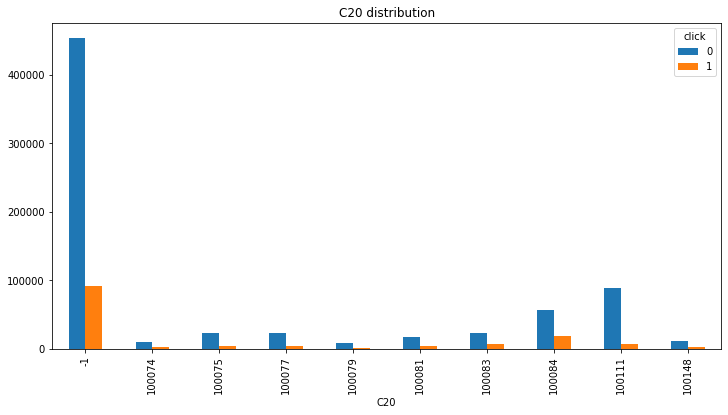

In [100]:
top10_C20.groupby(['C20','click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C20 distribution')

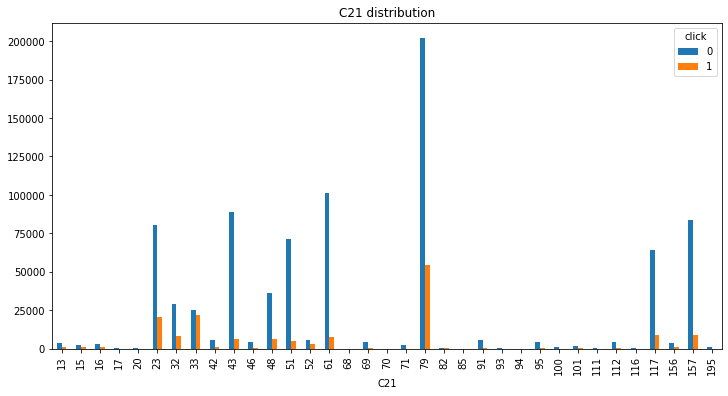

In [101]:
df_train.groupby(['C21','click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C21 distribution')

In [102]:
from collections import Counter

In [103]:
from sklearn.datasets import make_classification

In [104]:
X, Y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.8, random_state=0)

In [105]:
print(sorted(Counter(Y).items()))

[(0, 64), (1, 262), (2, 4674)]


## Predictive Modelling
<br>
To apply Machine Learining, first we need to split the data into training data and testing data. 
<br>
The data will be 80/20 splitted - 80% for training and 20% for testing.

In [114]:
import sklearn.model_selection
from sklearn import preprocessing

## We will be converting all object datatypes columns into integer for the model to understand the data
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
df_train['device_id'] = label_encoder.fit_transform(df_train['device_id'])
df_train['site_id'] = label_encoder.fit_transform(df_train['site_id'])
df_train['site_domain'] = label_encoder.fit_transform(df_train['site_domain'])
df_train['site_category'] = label_encoder.fit_transform(df_train['site_category'])
df_train['app_id'] = label_encoder.fit_transform(df_train['app_id'])
df_train['app_domain'] = label_encoder.fit_transform(df_train['app_domain'])
df_train['app_category'] = label_encoder.fit_transform(df_train['app_category'])
df_train['device_ip'] = label_encoder.fit_transform(df_train['device_ip'])
df_train['device_model'] = label_encoder.fit_transform(df_train['device_model'])

#Create target and feature variables
X = df_train.drop('click', axis = 1)
Y = df_train['click']


# split data into training and testing set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 100, shuffle = False)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800000, 23)
(200000, 23)
(800000,)
(200000,)


In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [122]:
gnb = GaussianNB()

In [123]:
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
y_predict = gnb.predict(X_test)

In [125]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92    170037
           1       0.00      0.00      0.00     29963

    accuracy                           0.85    200000
   macro avg       0.43      0.50      0.46    200000
weighted avg       0.72      0.85      0.78    200000



In [126]:
accuracy_score(Y_test, y_predict)

0.850185

In [127]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not clicked','Predicted Clicked'], index = ['Actual Not clicked','Actual clicked'])

,Predicted Not clicked,Predicted Clicked
Actual Not clicked,170037,0
Actual clicked,29963,0


#### DECISION TREE CLASSIFIER

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [129]:
model = DecisionTreeClassifier()

In [130]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now we will compare the predicted value with the actual ones — y_predict vs Y_test — using appropriate evaluation metrics:

In [131]:
y_predict = model.predict(X_test)

In [132]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86    170037
           1       0.27      0.30      0.28     29963

    accuracy                           0.77    200000
   macro avg       0.57      0.58      0.57    200000
weighted avg       0.78      0.77      0.78    200000



In [133]:
 from imblearn.metrics import sensitivity_specificity_support

In [134]:
sensitivity_specificity_support(Y_test, y_predict, average='macro')

(0.5779972975057608, 0.5779972975057608, None)

In [135]:
accuracy_score(Y_test, y_predict)

0.76933

**We have acheived an accuracy of 76.9% and precion of 78%**

Let's try out other evaluation metrics like **Confusion matrix and AUC**

In [136]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not clicked','Predicted Clicked'], index = ['Actual Not clicked','Actual clicked'])

,Predicted Not clicked,Predicted Clicked
Actual Not clicked,144733,25304
Actual clicked,20830,9133


Following conclusions can be drawn from the confusion matrix:
- The model has correctly identified **9076 clicked cases**.
- The model has incorrectly identified **25113 not clicked cases as clicked**.
- The model has incorrectly identified **20887 clicked cases as not clicked**.
- The model has correctly identified **144924 not clicked cases**.

In [137]:
pos_prob = model.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,pos_prob)

0.5779972975057609

The AUC value we have acheived is **0.583**.

### Parameter Tuning
<br>
Let's try to improve the performance of our model. 

In [138]:
from sklearn.model_selection import GridSearchCV


In [139]:
parameters = {'max_depth' : [5,10,20,50,100,None]}


In [140]:
decisiontree = DecisionTreeClassifier()


In [141]:
grid_search = GridSearchCV(decisiontree,parameters)


In [142]:
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20, 50, 100, None]},
        

In [143]:
decisiontree_best = grid_search.best_estimator_
pos_prob = decisiontree_best.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,pos_prob)

0.6794548331783393

In [144]:
y_predict = decisiontree_best.predict(X_test)
accuracy_score(Y_test,y_predict)

0.85132

In [145]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not clicked','Predicted Clicked'], index = ['Actual Not clicked','Actual clicked'])

,Predicted Not clicked,Predicted Clicked
Actual Not clicked,167390,2647
Actual clicked,27089,2874


We can see that the AUC score and accuracy score is increased significantly. The **AUC score** is changed from **0.583 to 0.723**. Similarly the new **accuracy score** obtained is **0.8426**. But we can also notice that the correctly identified cases (True Positive) is droped to **3536**.

### Visualizing The Decision Tree

In [146]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


In [147]:
tree_data = export_graphviz(decisiontree_best, out_file= None, filled = True, rounded = True, special_characters=True)


In [148]:
tree = graphviz.Source(tree_data)

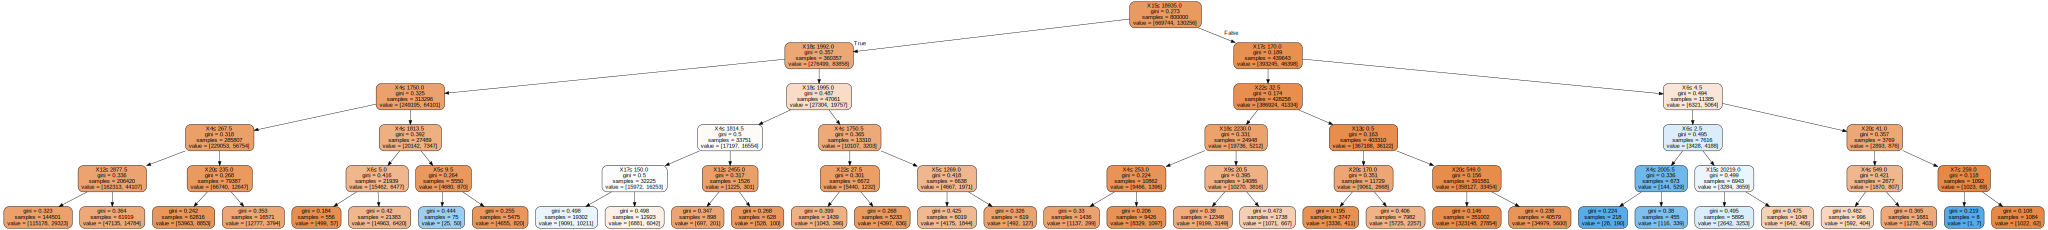

In [149]:
tree

#### Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
df_train = pd.read_csv('/Users/ankurghogale/Data Analytics Programming (Lab)/Untitled Folder/CTR/train-2.csv', nrows=100000)

In [152]:
X = df_train.drop('click', axis = 1)
Y = df_train['click']

In [153]:
#X = df_train.drop('click', axis = 1)
#Y = df_train['click']


# split data into training and testing set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 7, shuffle = False)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80000, 23)
(20000, 23)
(80000,)
(20000,)


In [154]:
X.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,1,0,18993,320,50,2161,0,35,-1,157


In [155]:
# instantiate the model 
model = LogisticRegression()

In [156]:
y_predict = model.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_predict

In [ ]:
print(classification_report(Y_test,y_predict))

In [ ]:
accuracy_score(Y_test, y_predict)

**We have acheived an accuracy of 83.9%**
<br>
Let's try out other evaluation metrics like **Confusion matrix and AUC**

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not clicked','Predicted Clicked'], index = ['Actual Not clicked','Actual clicked'])

 Following conclusions can be drawn from the confusion matrix:
- The model has correctly identified **0 clicked cases**.
- The model has incorrectly identified **0 not clicked cases as clicked**.
- The model has incorrectly identified **32061 clicked cases as not clicked**.
- The model has correctly identified **167939 not clicked cases**.

We can notice that even if we have good accuracy, our model could not predict the clicks at all due to the threshold which is 0.5 by default. Therefore, the model failed to predict '1' values due to its very less frequency in the dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)

In [ ]:
y_RFC_predict = forest.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_RFC_predict))

In [ ]:
accuracy_score(Y_test, y_RFC_predict)

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns =['Predicted Not clicked','Predicted Clicked'], index = ['Actual Not clicked','Actual clicked'])

Following conclusions can be drawn from the confusion matrix:
- The model has correctly identified **4282 clicked cases**.
- The model has incorrectly identified **5908 not clicked cases as clicked**.
- The model has incorrectly identified **25681 clicked cases as not clicked**.
- The model has correctly identified **164129 not clicked cases**.

In [ ]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity_specificity_support(Y_test, y_RFC_predict, average='macro')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'max_depth' : [5,10,20,50,100,None]}

In [ ]:
forest = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(forest,parameters)

In [ ]:
grid_search.fit(X_train,Y_train)